# Cyclistic Bike-Share Company
## About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. 

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. 

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs. 

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

In order to answer the key business questions, we will follow the steps of the data analysis process: **ask, prepare, process, analyze, share, and act.**

# Ask
The business task is to understand how casual drivers and annual members use bikes differently, identify trends, and based on that give recommendations on how to maximize the number of annual members. 

# Prepare
Data is provided by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement) , this is public data and collected by the first party. However, data-privacy issues prohibit from using riders’ personally identifiable information.

We have data from April 2021 to March 2022. Data are in CSV files, each file for each month. For the purpose of this case, study datasets are appropriate and considered by default as reliable, original, comprehensive, current, and cited. 

In [1]:
# Load packages 
library(tidyverse)
library(tidyr)
library(purrr)
library(dplyr)
library(lubridate)
library(readr)
library(janitor)
library(scales)
library(leaflet)
library(htmlwidgets)
library(IRdisplay)

options(dplyr.summarise.inform = FALSE)
list.files(path = "../input")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




[1] "cyclistic-bike-share"

In [2]:
# Load data
df1 <- read_csv('/kaggle/input/cyclistic-bike-share/202104-divvy-tripdata.csv')
df2 <- read_csv('/kaggle/input/cyclistic-bike-share/202105-divvy-tripdata.csv')
df3 <- read_csv('/kaggle/input/cyclistic-bike-share/202106-divvy-tripdata.csv')
df4 <- read_csv('/kaggle/input/cyclistic-bike-share/202107-divvy-tripdata.csv')
df5 <- read_csv('/kaggle/input/cyclistic-bike-share/202108-divvy-tripdata.csv')
df6 <- read_csv('/kaggle/input/cyclistic-bike-share/202109-divvy-tripdata.csv')
df7 <- read_csv('/kaggle/input/cyclistic-bike-share/202110-divvy-tripdata.csv')
df8 <- read_csv('/kaggle/input/cyclistic-bike-share/202111-divvy-tripdata.csv')
df9 <- read_csv('/kaggle/input/cyclistic-bike-share/202112-divvy-tripdata.csv')
df10 <- read_csv('/kaggle/input/cyclistic-bike-share/202201-divvy-tripdata.csv')
df11 <- read_csv('/kaggle/input/cyclistic-bike-share/202202-divvy-tripdata.csv')
df12 <- read_csv('/kaggle/input/cyclistic-bike-share/202203-divvy-tripdata.csv')

Rows: 337230 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 531633 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 729595 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

In [3]:
# Concate in one df
df <- rbind(df1,df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12)
head(df)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


Now we need to check data integrity. Data integrity includes accuracy, completeness, consistency, and trustworthiness of data. 

In the view of df, it is visible that some of start_station_name and end_station_name are missing. Let's check how many missing values we have. 

In [4]:
# Lets have a quick look at our df
glimpse(df)

Rows: 5,723,532
Columns: 13
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508…
$ rideable_type      <chr> "classic_bike", "docked_bike", "docked_bike", "clas…
$ started_at         <dttm> 2021-04-12 18:25:36, 2021-04-27 17:27:11, 2021-04-…
$ ended_at           <dttm> 2021-04-12 18:56:55, 2021-04-27 18:31:29, 2021-04-…
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th St"…
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305000…
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 4…
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "20121",…
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 4…
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.658…
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 4…
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.658…
$ member_cas

In [5]:
# Check for missing values
missing_values <- colSums(is.na(df))

# Print the columns with missing values
print(missing_values[missing_values > 0])

start_station_name   start_station_id   end_station_name     end_station_id 
            745376             745373             796247             796247 
           end_lat            end_lng 
              4716               4716 


More than 1500000 stations names are missing. However, it is around 30% of our dataset, so the sample size is still good to analyze even if we remove those rows later during data cleaning.

Also, we have some missing data in lat/long coordinates. And no missing values in the others column. 

So, we have problems with missing data in stations name columns, however, removing missing values will not affect our result about how casual riders and annual members are different. Since it is only 30% of the data and our data sample is still big enough. 
We can consider our data as complete and accurate, collected from trustworthy sources, and credible. 

# Process

Now we can start the data-cleaning process by checking for duplicated rows.

In [6]:
# Check for duplicated rows
duplicated_rows <- df[duplicated(df), ]

# Print the duplicated rows
print(duplicated_rows)

# A tibble: 0 × 13
# … with 13 variables: ride_id <chr>, rideable_type <chr>, started_at <dttm>,
#   ended_at <dttm>, start_station_name <chr>, start_station_id <chr>,
#   end_station_name <chr>, end_station_id <chr>, start_lat <dbl>,
#   start_lng <dbl>, end_lat <dbl>, end_lng <dbl>, member_casual <chr>


No duplicate rows. 
Let's check in particular duplicate ride_id column since it should be unique.

In [7]:
# Check for duplicates in a ride_id colum 
duplicated_rows_id <- df[duplicated(df$ride_id), ]

# Print the duplicated rows
print(duplicated_rows_id)

# A tibble: 0 × 13
# … with 13 variables: ride_id <chr>, rideable_type <chr>, started_at <dttm>,
#   ended_at <dttm>, start_station_name <chr>, start_station_id <chr>,
#   end_station_name <chr>, end_station_id <chr>, start_lat <dbl>,
#   start_lng <dbl>, end_lat <dbl>, end_lng <dbl>, member_casual <chr>


No duplicates in ride_id were found. 

Also, we need to remove rows where start_station name and end_station_name are missing.

In [8]:
# Remove missing values
df_clean <- drop_na(df, start_station_name)
df_clean <- drop_na(df_clean, end_station_name)

#Check for missing values agaim
missing_values2 <- colSums(is.na(df_clean))

# Print the columns with missing values
print(missing_values2[missing_values2 > 0])

named numeric(0)


In [9]:
# Lets check columns names
colnames(df_clean)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

We can change member_casual column name to give it more meaning. 

In [10]:
# Rename column
df_clean <- df_clean %>% 
  rename(customer_type = member_casual)

In [11]:
#Display structure of df
str(df_clean)

tibble [4,641,395 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4641395] "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr [1:4641395] "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:4641395], format: "2021-04-12 18:25:36" "2021-04-27 17:27:11" ...
 $ ended_at          : POSIXct[1:4641395], format: "2021-04-12 18:56:55" "2021-04-27 18:31:29" ...
 $ start_station_name: chr [1:4641395] "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr [1:4641395] "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr [1:4641395] "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr [1:4641395] "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num [1:4641395] 41.9 41.8 41.

All columns have an appropriate data type. 

The next step is adding the column ride_length.


In [12]:
# Create new column
df_clean$ride_length <- difftime(
  df_clean$ended_at, 
  df_clean$started_at,
  units = "min"
  ) 

In [13]:
# Change datatype and round to 2 decimal points
df_clean$ride_length <- round(as.numeric(df_clean$ride_length), 2)

Also, we will remove ride_length that is shorter than 1 min since it might be by mistake.

In [14]:
# Remove short trips
df_clean <- df_clean %>% 
  filter(df_clean$ride_length >1)

Further, let us add week_day column which will be useful in later analysis.

In [15]:
# New column with weekday
df_clean$week_day <- lubridate::wday(df_clean$started_at, label=TRUE)

Later for analysis, we will need column month as well.

In [16]:
#Month column
df_clean$month <- month(df_clean$started_at, label=TRUE)
head(df_clean)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,customer_type,ride_length,week_day,month
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>,<ord>
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,31.32,Mon,Apr
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,64.30,Tue,Apr
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,5697.65,Sat,Apr
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,25.10,Sat,Apr
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,91.28,Sat,Apr
53C38EB01E6FA5C4,classic_bike,2021-04-03 16:28:21,2021-04-03 16:29:47,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.77937,-87.66484,41.77937,-87.66484,casual,1.43,Sat,Apr


In [17]:
# Check data types and column names one more time
glimpse(df_clean)

Rows: 4,579,551
Columns: 16
$ ride_id            <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508…
$ rideable_type      <chr> "classic_bike", "docked_bike", "docked_bike", "clas…
$ started_at         <dttm> 2021-04-12 18:25:36, 2021-04-27 17:27:11, 2021-04-…
$ ended_at           <dttm> 2021-04-12 18:56:55, 2021-04-27 18:31:29, 2021-04-…
$ start_station_name <chr> "State St & Pearson St", "Dorchester Ave & 49th St"…
$ start_station_id   <chr> "TA1307000061", "KA1503000069", "20121", "TA1305000…
$ end_station_name   <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 4…
$ end_station_id     <chr> "13235", "KA1503000069", "20121", "13235", "20121",…
$ start_lat          <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 4…
$ start_lng          <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.658…
$ end_lat            <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 4…
$ end_lng            <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.658…
$ customer_t

To ensure that data is cleaned we removed missing data and duplicates, and checked column names and data type inconsistencies. Now data is ready for analysis. 

# Analyze and Share

As a first action, we will count number of rides for casual riders and member riders in particular. 

In [18]:
customer_counts <- table(df_clean$customer_type)
customer_counts


 casual  member 
2023398 2556153 

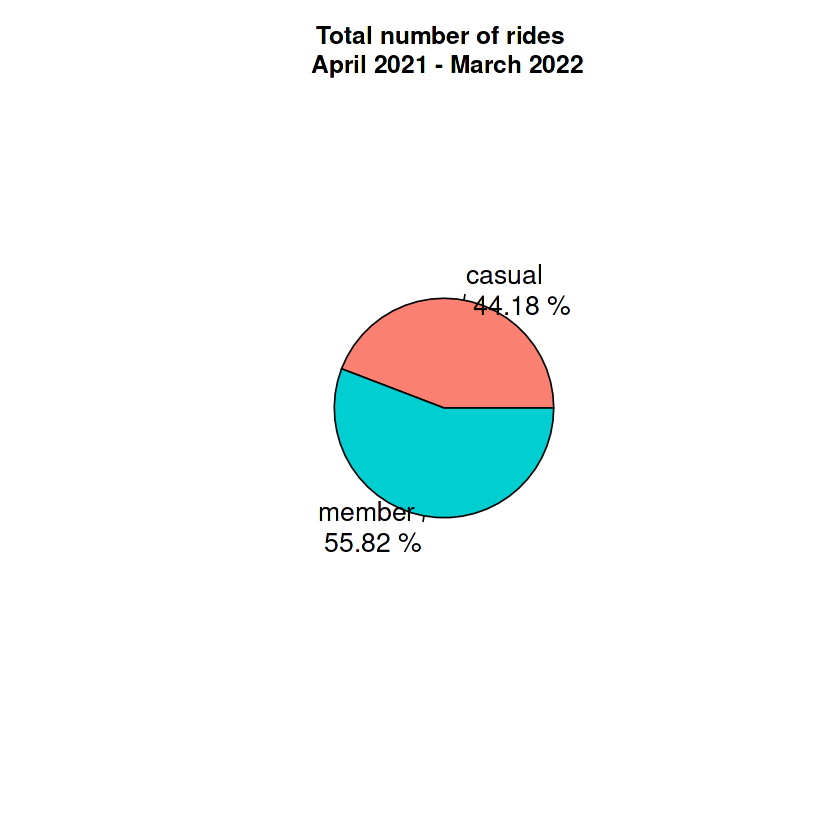

In [19]:
# Visualize it as a pie chart
total_rides <- sum(customer_counts)
pie_percent <- round((customer_counts / total_rides) * 100, 2)
pie_label <- c("casual", "member")
pie_label <- paste(pie_label, "\n", pie_percent, "%")

pie(customer_counts, pie_percent,
    main = "Total number of rides \n April 2021 - March 2022",
    col= c("salmon", "darkturquoise"),
    labels = pie_label,
   cex=1.3)

As we can see members are taking 55.8% of total rides and casual riders - 44.1%. 

The next move is to analyze information about ride length.

In [20]:
#Calculate mean, max and min ride length 
mean(df_clean$ride_length)
max(df_clean$ride_length)
min(df_clean$ride_length)

[1] 21.63956

[1] 55944.15

[1] 1.02

The average total ride length is 21.6 min, the maximum ride is 55944 min and the minimum is 1 min. Now we can compare those numbers between casual rides and members.

In [21]:
# Calculate mean ride length for different customer type
mean_type <- aggregate(ride_length ~ customer_type, data = df_clean, FUN = mean)
mean_type

customer_type,ride_length
<chr>,<dbl>
casual,32.37495
member,13.14165


As shown, casual riders have an average trip of 32 min and members' average trip is 13 min. We can assume that members are using bikes for transportation when casual riders prefer them for pleasure. 
It can be interesting to know how the average ride length is changing during the week. 

In [22]:
# Calculate mean right length for customer type and week day
mean_type_week <- aggregate(ride_length ~ customer_type + week_day, data = df_clean, FUN = mean)
mean_type_week

customer_type,week_day,ride_length
<chr>,<ord>,<dbl>
casual,Sun,37.62574
member,Sun,15.18715
casual,Mon,32.24078
member,Mon,12.70309
casual,Tue,28.35856
member,Tue,12.25813
casual,Wed,28.43617
member,Wed,12.43677
casual,Thu,28.18290


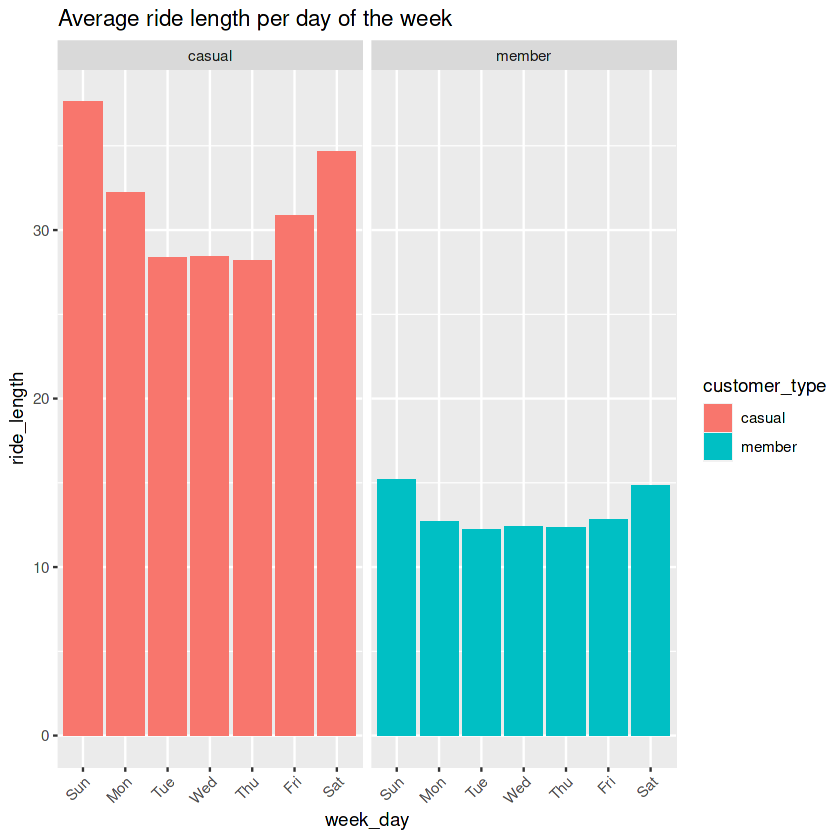

In [23]:
# Visualize average ride length per day of the week
ggplot(data = mean_type_week) +
  geom_col(mapping = aes(x=week_day, y=ride_length, fill=customer_type)) +
facet_wrap(~customer_type) +
  theme(axis.text.x=element_text(angle = 45, hjust=1)) +
  labs(title = "Average ride length per day of the week")

As shown, both casual and members have the longest average rides on Saturday and Sunday and the shortest average on Tuesday. 

Now lets take a closer look at weekday information.

In [24]:
# Count number of rides per weekday and customer type
week_day_rides <- df_clean %>%
  group_by(customer_type, week_day) %>%
  summarise(number_of_rides = n()) %>% 
  arrange(week_day)

week_day_rides

customer_type,week_day,number_of_rides
<chr>,<ord>,<int>
casual,Sun,397815
member,Sun,310212
casual,Mon,229277
member,Mon,354931
casual,Tue,211763
member,Tue,397254
casual,Wed,219842
member,Wed,405589
casual,Thu,225975


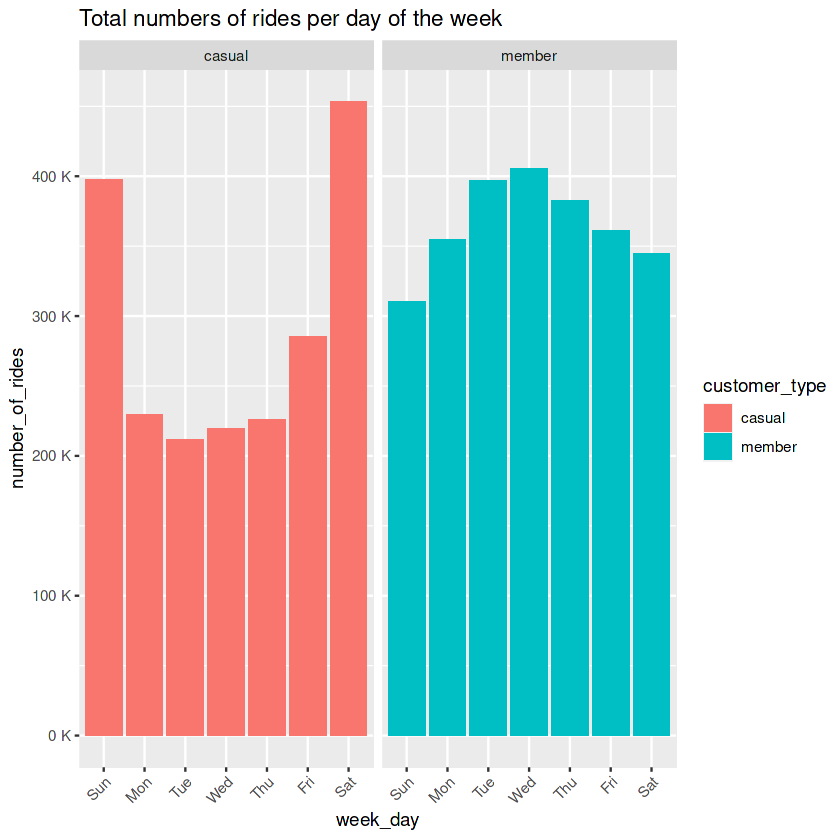

In [25]:
# Visualize numbers of rides per day of the week
ggplot(data = week_day_rides) +
  geom_col(mapping = aes(x=week_day, y=number_of_rides, fill=customer_type)) +
  facet_wrap(~customer_type) +
  theme(axis.text.x=element_text(angle = 45, hjust=1)) +
  labs(title = "Total numbers of rides per day of the week") +
  scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3))

The most popular day for members is Wednesday and the least popular is Sunday. And for casual riders situation is quite the opposite - the most popular day is Saturday and the least one Tuesday. 

Coming next - analyzing data about the time of the day. 

In [26]:
# Number of rides per hours of the day and customer type
df_clean$hour <- format(df_clean$started_at, format = "%H")

hour_rides <- df_clean %>%
  group_by(customer_type, hour) %>%
  summarise(number_of_rides = n()) %>% 
  arrange(hour)
hour_rides

customer_type,hour,number_of_rides
<chr>,<chr>,<int>
casual,00,41677
member,00,25319
casual,01,30443
member,01,16451
casual,02,19611
member,02,9158
casual,03,10233
member,03,5196
casual,04,6609


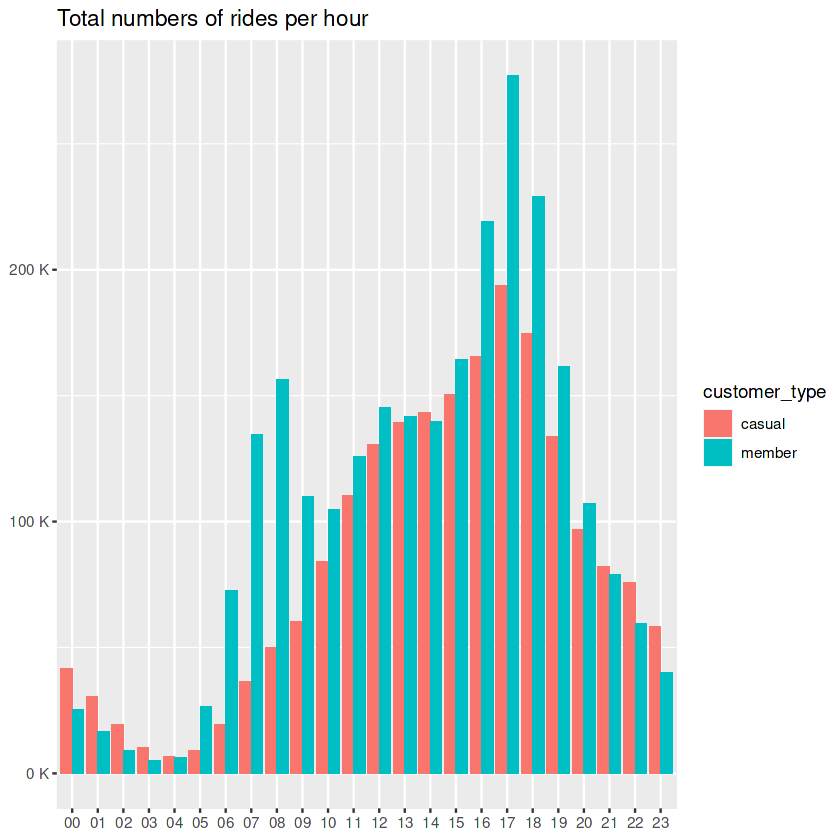

In [27]:
# Prepare visualization
ggplot(hour_rides) +
  geom_bar(mapping = aes(fill=customer_type, y=number_of_rides, x=hour), 
           position="dodge", stat="identity") +
  labs(title = "Total numbers of rides per hour") +
  theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
  scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3))

For members, the most popular time is from 16 to 18. However, casual riders also have the same pick hours. 

The following stage is to compare - the number of rides and month of the year.

In [28]:
# Find number of rides per month 
month_rides <- df_clean %>% 
  group_by(customer_type,month) %>%  
  summarise(number_of_rides = n()) %>% 
  arrange(month) 
month_rides

customer_type,month,number_of_rides
<chr>,<ord>,<int>
casual,Jan,12480
member,Jan,66565
casual,Feb,14971
member,Feb,72667
casual,Mar,66397
member,Mar,146468
casual,Apr,119349
member,Apr,175248
casual,May,214625


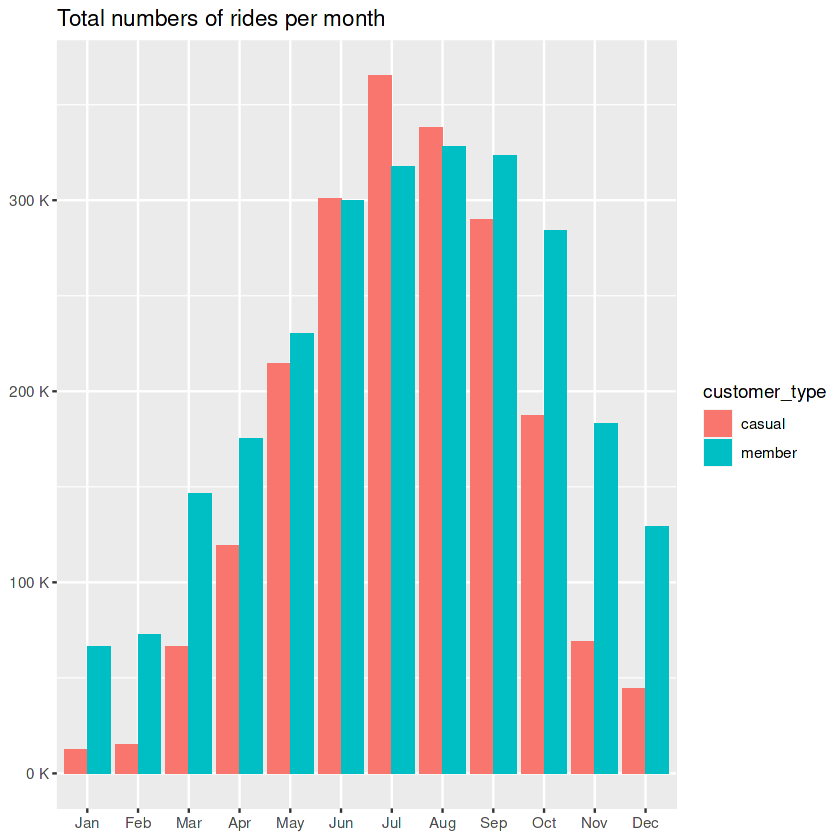

In [29]:
# Distribution number of rides per month of the year
ggplot(month_rides, aes(fill=customer_type, y=number_of_rides, x=month)) + 
    geom_bar(position="dodge", stat="identity") +
  labs(title = "Total numbers of rides per month") +
  theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
  scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3))

For both casual riders and members summer months are the most popular which sounds logical due to weather conditions in Chicago. 

One more thing to check - the rideable type that customers are using, we might get an interesting insight. 

In [30]:
# Count number of rides per rideable type
rideable_type_rides <- df_clean %>%
  group_by(customer_type, rideable_type) %>%
  summarise(number_of_rides = n()) %>% 
  arrange(rideable_type)
rideable_type_rides

customer_type,rideable_type,number_of_rides
<chr>,<chr>,<int>
casual,classic_bike,1239305
member,classic_bike,1959914
casual,docked_bike,301611
casual,electric_bike,482482
member,electric_bike,596239


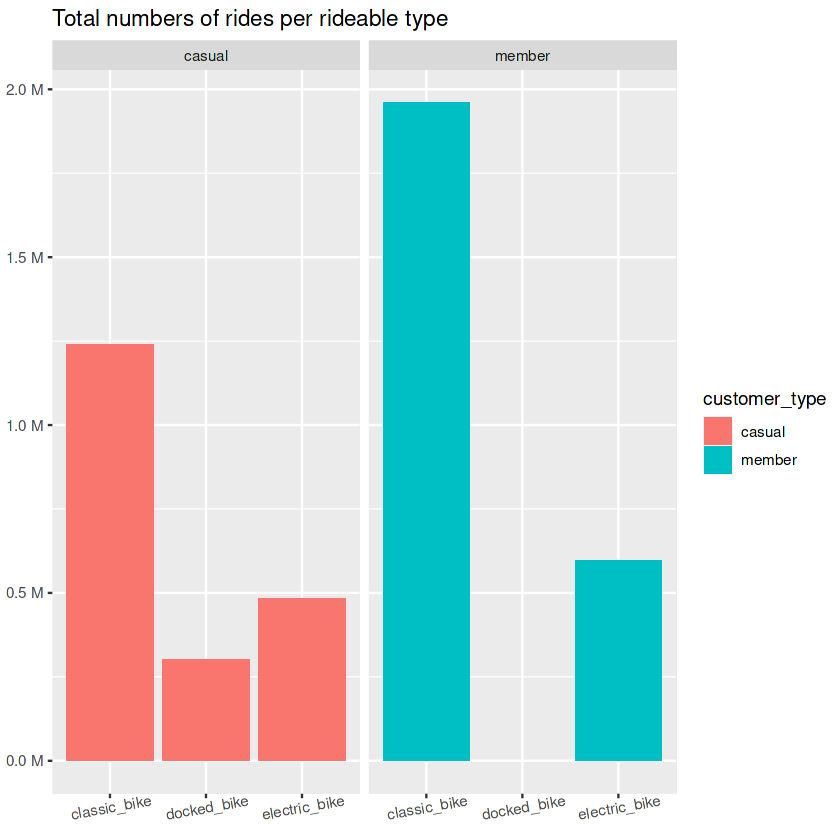

In [31]:
# Visualize numbers of rides per rideable type
ggplot(data = rideable_type_rides) +
  geom_col(mapping = aes(x=rideable_type, y=number_of_rides, fill=customer_type)) +
  facet_wrap(~customer_type) +
  theme(axis.text.x=element_text(angle = 10), 
        axis.title.x = element_blank(), axis.title.y = element_blank()) +
  labs(title = "Total numbers of rides per rideable type") +
  scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6))

As we can observe, members are not using dock bikes at all compared to casual riders. 

We also can check the list of the most popular stations for customers.

In [32]:
# Popular station for casual customers
station_casual <- df_clean %>% 
  group_by(start_station_name, customer_type) %>% 
  filter(customer_type == "casual") %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(desc(number_of_rides))

head(station_casual, n=10)

start_station_name,customer_type,number_of_rides
<chr>,<chr>,<int>
Streeter Dr & Grand Ave,casual,64677
Millennium Park,casual,31526
Michigan Ave & Oak St,casual,28223
Shedd Aquarium,casual,22217
Theater on the Lake,casual,20145
Wells St & Concord Ln,casual,18715
DuSable Lake Shore Dr & Monroe St,casual,17104
Lake Shore Dr & Monroe St,casual,16738
Clark St & Lincoln Ave,casual,16030


In [33]:
# Popular station for member customers
station_member <- df_clean %>% 
group_by(start_station_name, customer_type) %>% 
filter(customer_type == "member") %>% 
summarise(number_of_rides = n()) %>% 
arrange(desc(number_of_rides)) 

head(station_member, n=10)

start_station_name,customer_type,number_of_rides
<chr>,<chr>,<int>
Kingsbury St & Kinzie St,member,23864
Clark St & Elm St,member,23672
Wells St & Concord Ln,member,22794
Wells St & Elm St,member,20167
Dearborn St & Erie St,member,18282
Wells St & Huron St,member,18029
St. Clair St & Erie St,member,18011
Clinton St & Madison St,member,17181
Broadway & Barry Ave,member,16825


For better visualization, we created a map with station names and coordinates.

In [34]:
# Number of rides per station for both customer type
station_all_type <- df_clean %>% 
group_by(start_station_name, customer_type) %>% 
summarise(number_of_rides = n()) %>% 
arrange(desc(number_of_rides)) 

# Dataframe with coordinates
station_coord <- df_clean %>%
select(start_station_name, start_lat, start_lng) %>%
distinct(start_station_name, .keep_all = TRUE)

# Merge data
merged_data <- station_all_type %>%
left_join(station_coord, by = "start_station_name")

head(merged_data)

start_station_name,customer_type,number_of_rides,start_lat,start_lng
<chr>,<chr>,<int>,<dbl>,<dbl>
Streeter Dr & Grand Ave,casual,64677,41.89228,-87.61204
Millennium Park,casual,31526,41.88103,-87.62408
Michigan Ave & Oak St,casual,28223,41.90096,-87.62378
Kingsbury St & Kinzie St,member,23864,41.88918,-87.63851
Clark St & Elm St,member,23672,41.90281,-87.63174
Wells St & Concord Ln,member,22794,41.91213,-87.63466


In [38]:
# Create a Leaflet map object
map <- leaflet() %>%
  addTiles()

map <- map %>%
  addCircleMarkers(
    data = subset(merged_data[1:100,], customer_type == "casual"),
    lat = ~start_lat,
    lng = ~start_lng,
    label = ~paste(start_station_name, "Rides:", number_of_rides),
    color = "red",
    radius = 5,
    group = "Casual"
  ) %>%
  addCircleMarkers(
    data = subset(merged_data[1:100,], customer_type == "member"),
    lat = ~start_lat,
    lng = ~start_lng,
    label = ~paste(start_station_name, "Rides:", number_of_rides),
    color = "blue",
    radius = 5,
    group = "Member"
  )

map <- map %>%
  addLayersControl(
    overlayGroups = c("Casual", "Member"),
    options = layersControlOptions(collapsed = FALSE)
  )


In [39]:
# Display map
display_html('<iframe src="map.html"></iframe>')

In [40]:
# Save map
saveWidget(map, file="map.html")

As it is clearly shown on the map, casual riders tend to take bikes from the city center and tourist places, members take bikes in other districts as well. So we can assume members are using the bike for everyday transportation, for example from home to work. 

## Observations: 

* Members account for 55.82% of the total rides, while casual riders make up 44.18% of the rides.

* Casual riders tend to have longer average trips, with an average ride length of 32 minutes, compared to members who have an average ride length of 13 minutes.

* Casual riders prefer to rent bikes on Saturdays, while members are more likely to rent bikes on Wednesdays. This observation supports the idea that members primarily use bikes for transportation during the work week, while casual riders use them for leisure on weekends.

* The most popular time of the day for both member and casual riders is between 16:00 and 18:00.

* Both member and casual riders show a preference for riding during the summer months.

* Docked bikes are exclusively used by casual riders. Classic bikes are preferred by both casual riders and members, as electric bikes are more expensive.

# Act
## Recommendations

* In order to accomodate the needs of casual riders who do not frequently use bikes, we propose the introduction of a new annual subscription option that comes with specific limitations on days and times. This unique membership, focused on weekends, offers a reduced price compared to the standard membership package. By implementing this subscription, we aim to attract casual riders who prefer a more flexible option that aligns with their occasional bike usage patterns.

* To create awareness and generate interest in this new annual membership, we will launch a comprehensive social media campaign across popular platforms such as Instagram, Facebook, and Youtube. We will highlight the benefits and advantages of opting for the annual subscription over one-time rides, educate casual riders about the convenience, cost-effectiveness, and long-term value associated with the annual membership option.

* Recognizing the importance of personalization, we will also employ targeted marketing strategies. Regular casual riders will receive personalized offers with exclusive subscription discounts. By tailoring our promotions to their riding habits and preferences, we aim to incentivize them to transition from random usage to a more consistent and cost-effective membership.


### Thank you for reading!